In [11]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [18]:
df = pd.read_csv("C:/Users/biank/Downloads/candy-data.csv")
print(df)

                competitorname  chocolate  fruity  caramel  peanutyalmondy  \
0                    100 Grand          1       0        1               0   
1                 3 Musketeers          1       0        0               0   
2                     One dime          0       0        0               0   
3                  One quarter          0       0        0               0   
4                    Air Heads          0       1        0               0   
..                         ...        ...     ...      ...             ...   
80                   Twizzlers          0       1        0               0   
81                    Warheads          0       1        0               0   
82        WelchÕs Fruit Snacks          0       1        0               0   
83  WertherÕs Original Caramel          0       0        1               0   
84                    Whoppers          1       0        0               0   

    nougat  crispedricewafer  hard  bar  pluribus  sugarpercent

In [19]:
df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [20]:
df.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in df.columns:
    df[i] = le.fit_transform(df[i])

In [37]:
X = df.iloc[:,0:12].values
y = df.iloc[:,12].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [38]:
X

array([[ 0,  1,  0, ...,  0, 25, 24],
       [ 1,  1,  0, ...,  0, 23, 18],
       [44,  0,  0, ...,  0,  0,  8],
       ...,
       [82,  0,  1, ...,  1, 14, 13],
       [83,  0,  0, ...,  0,  9, 11],
       [84,  1,  0, ...,  1, 29, 23]], dtype=int64)

In [39]:
y

array([71, 73,  7, 37, 48, 46, 58,  1, 18, 10, 19, 14,  2, 29, 24, 32, 22,
       40, 59,  9, 47, 28, 56, 65, 57, 61,  4, 60, 81, 26, 21, 50, 76, 70,
       39, 53, 78, 64, 67, 42, 51, 55, 75, 69,  0, 23, 38, 74, 16, 25, 15,
       83, 84, 79, 77, 13, 68,  5, 30, 12, 66, 54, 17, 36, 80, 62, 63, 49,
       72, 11,  8,  6,  3, 52, 43, 31, 35, 45, 41, 82, 34, 20, 33, 27, 44],
      dtype=int64)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (12,)))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(23, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 100)               1300      
                                                                 
 dense_25 (Dense)            (None, 50)                5050      
                                                                 
 dense_26 (Dense)            (None, 23)                1173      
                                                                 
 dense_27 (Dense)            (None, 1)                 24        
                                                                 
Total params: 7,547
Trainable params: 7,547
Non-trainable params: 0
_________________________________________________________________


In [48]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
3/3 [==============================] - 1s 119ms/step - loss: 14.7259 - mse: 14.7259 - val_loss: 0.1452 - val_mse: 0.1452
Epoch 2/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0987 - mse: 0.0987 - val_loss: 0.1351 - val_mse: 0.1351
Epoch 3/100
3/3 [==============================] - 0s 20ms/step - loss: 0.0602 - mse: 0.0602 - val_loss: 0.0797 - val_mse: 0.0797
Epoch 4/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0681 - mse: 0.0681 - val_loss: 0.3430 - val_mse: 0.3430
Epoch 5/100
3/3 [==============================] - 0s 22ms/step - loss: 0.2007 - mse: 0.2007 - val_loss: 0.0485 - val_mse: 0.0485
Epoch 6/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0380 - mse: 0.0380 - val_loss: 0.0549 - val_mse: 0.0549
Epoch 7/100
3/3 [==============================] - 0s 23ms/step - loss: 0.0310 - mse: 0.0310 - val_loss: 0.0550 - val_mse: 0.0550
Epoch 8/100
3/3 [==============================] - 0s 26ms/step - loss: 0.0304 - mse: 0

In [49]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 24ms/step - loss: 0.0366 - mse: 0.0366


[0.03659827634692192, 0.03659827634692192]

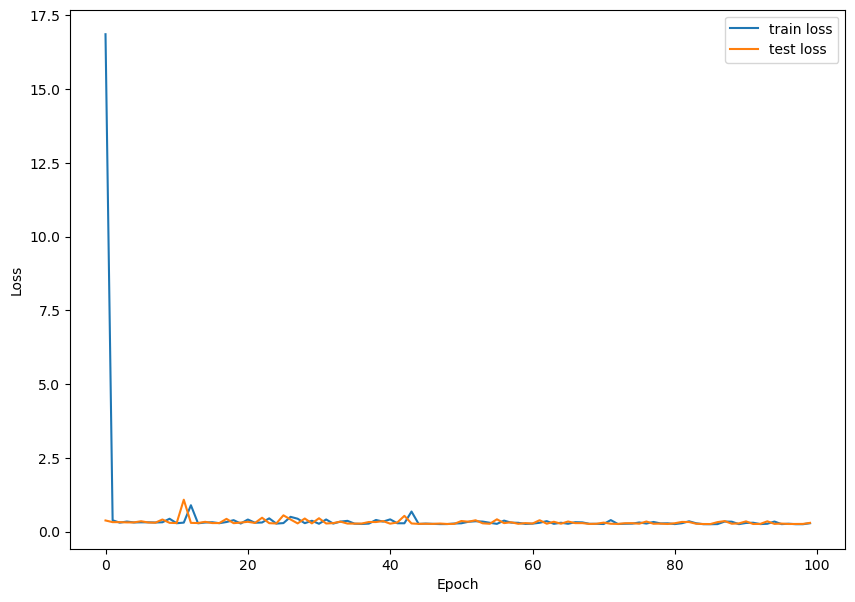

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

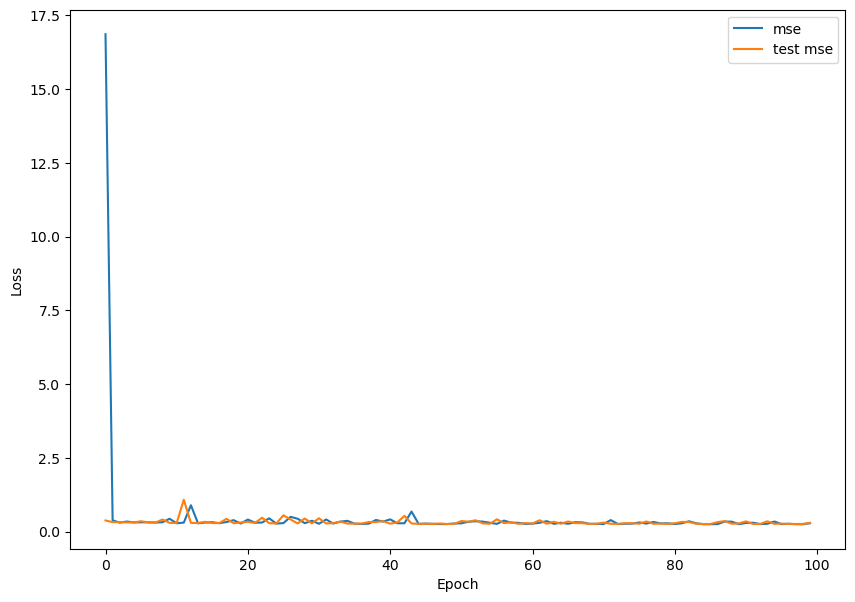

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()